In [1]:
import pandas as pd
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_excel('C:/Users/Akram/Downloads/Customer_Segmentation/data.xlsx')

# Check the first few rows of the DataFrame
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

   Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
0            1                   15                      39         Mtwara   
1            2                   15                      81  Zanzibar City   
2            3                   16                       6         Mtwara   
3            4                   16                      77  Zanzibar City   
4            5                   17                      40         Mtwara   

  Most Purchased Product  Repayment Score 1-5  
0           Mtindi 500ml                    1  
1       Fresh Milk 250ml                    2  
2           Mtindi 500ml                    3  
3       Fresh Milk 250ml                    4  
4           Mtindi 500ml                    2  
Merchant Id                int64
Annual Revenue (k$)        int64
Spending Score (1-100)     int64
City                      object
Most Purchased Product    object
Repayment Score 1-5        int64
dtype: object
Merchant Id               0
Ann

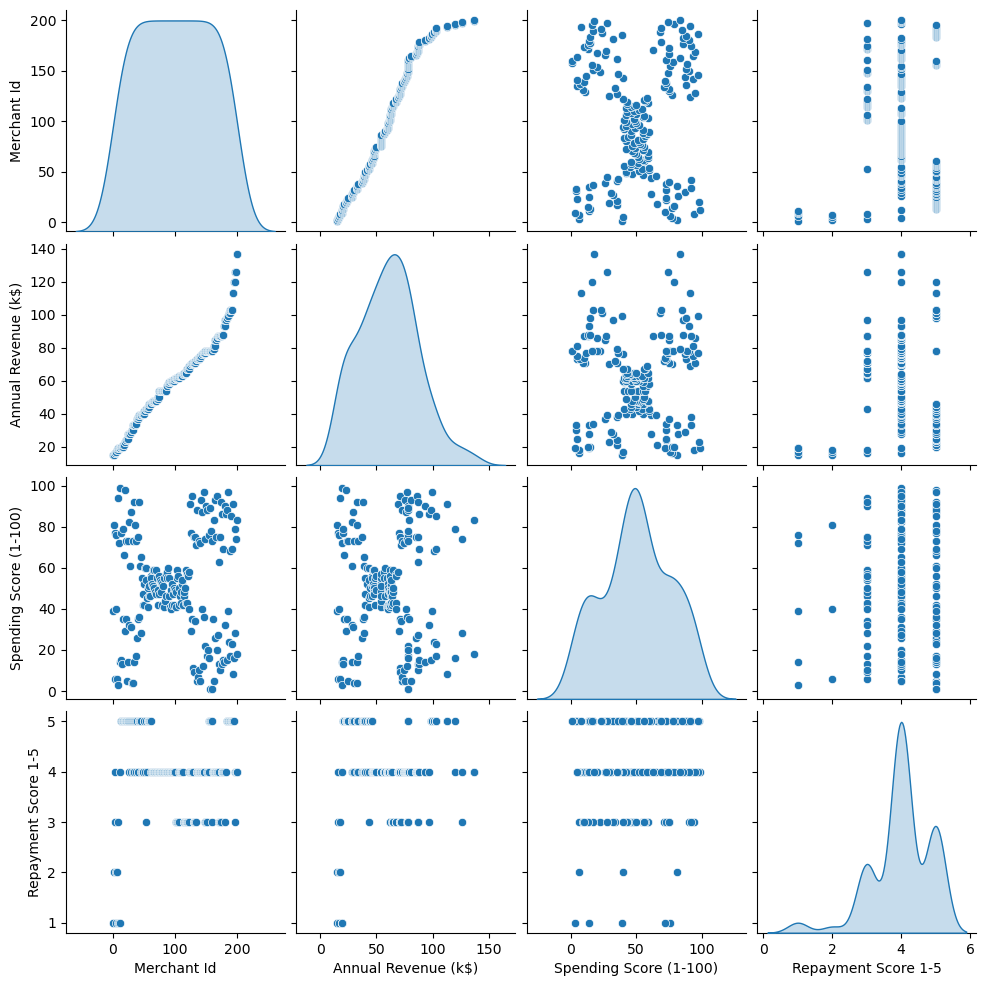

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

xl = pd.ExcelFile('C:/Users/Akram/Downloads/Customer_Segmentation/data.xlsx')
df = xl.parse('Sheet1')
sns.pairplot(df, diag_kind='kde')
plt.show()

In [4]:
# Check for duplicate rows
print(df.duplicated().sum())

# Check for outliers in Annual Revenue
q1 = df['Annual Revenue (k$)'].quantile(0.25)
q3 = df['Annual Revenue (k$)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Annual Revenue (k$)'] < lower_bound) | (df['Annual Revenue (k$)'] > upper_bound)]
print(outliers)

# Calculate summary statistics for the numerical columns
print(df.describe())

0
     Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
198          199                  137                      18  Dar es Salaam   
199          200                  137                      83  Dar es Salaam   

    Most Purchased Product  Repayment Score 1-5  
198           Mtindi 250ml                    4  
199           Mtindi 250ml                    4  
       Merchant Id  Annual Revenue (k$)  Spending Score (1-100)  \
count   200.000000           200.000000              200.000000   
mean    100.500000            60.560000               50.200000   
std      57.879185            26.264721               25.823522   
min       1.000000            15.000000                1.000000   
25%      50.750000            41.500000               34.750000   
50%     100.500000            61.500000               50.000000   
75%     150.250000            78.000000               73.000000   
max     200.000000           137.000000               99.000000   

   

In [6]:
print(df.columns.tolist())

['Merchant Id', 'Annual Revenue (k$)', 'Spending Score (1-100)', 'City', 'Most Purchased Product', 'Repayment Score 1-5']


In [14]:
print(df.describe())

       Merchant Id  Annual Revenue (k$)  Spending Score (1-100)  \
count   200.000000           200.000000              200.000000   
mean    100.500000            60.560000               50.200000   
std      57.879185            26.264721               25.823522   
min       1.000000            15.000000                1.000000   
25%      50.750000            41.500000               34.750000   
50%     100.500000            61.500000               50.000000   
75%     150.250000            78.000000               73.000000   
max     200.000000           137.000000               99.000000   

       Repayment Score 1-5  
count           200.000000  
mean              3.990000  
std               0.850598  
min               1.000000  
25%               4.000000  
50%               4.000000  
75%               5.000000  
max               5.000000  


In [7]:
# Create a credit scoring algorithm
def credit_score(row):
    score = 0
    if row['Repayment Score 1-5'] == 5:
        score += 20
    elif row['Repayment Score 1-5'] == 4:
        score += 15
    elif row['Repayment Score 1-5'] == 3:
        score += 10
    elif row['Repayment Score 1-5'] == 2:
        score += 5
    elif row['Repayment Score 1-5'] == 1:
        score += 0

    if row['City'] == 'Dar es Salaam':
        score += 10
    elif row['City'] == 'Arusha':
        score += 5
    elif row['City'] == 'Mtwara':
        score += 3
    elif row['City'] == 'Zanzibar City':
        score += 2

    if row['Most Purchased Product'] == 'Fresh Milk 250ml':
        score += 5
    elif row['Most Purchased Product'] == 'Mtindi 500ml':
        score += 3
    elif row['Most Purchased Product'] == 'Ghee 500g':
        score += 1

    return score

# Add a new column to the DataFrame with the credit scores
df['Credit_Score'] = df.apply(credit_score, axis=1)

# Identify the most creditworthy merchants
creditworthy_merchants = df[df['Credit_Score'] >= 30]
print(creditworthy_merchants)

     Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
154          155                   78                      16  Dar es Salaam   
155          156                   78                      89  Dar es Salaam   
156          157                   78                       1  Dar es Salaam   
157          158                   78                      78  Dar es Salaam   
158          159                   78                       1  Dar es Salaam   
182          183                   98                      15  Dar es Salaam   
183          184                   98                      88  Dar es Salaam   
184          185                   99                      39  Dar es Salaam   
185          186                   99                      97  Dar es Salaam   
186          187                  101                      24  Dar es Salaam   
187          188                  101                      68  Dar es Salaam   
188          189                  103   

In [8]:
# Perform k-means clustering on the DataFrame
from sklearn.cluster import KMeans

# Select numerical columns only
X = df[['Annual Revenue (k$)', 'Spending Score (1-100)', 'Credit_Score']]

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['Cluster_Number'] = kmeans.labels_

# Define the cluster natures
cluster_natures = {
    0: 'Careful',
    1: 'Spendthrift',
    2: 'General',
    3: 'Target'
}

# Add a new column to the DataFrame with the cluster natures
df['Cluster_Nature'] = df['Cluster_Number'].map(cluster_natures)

# Print the updated DataFrame
print(df)

     Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
0              1                   15                      39         Mtwara   
1              2                   15                      81  Zanzibar City   
2              3                   16                       6         Mtwara   
3              4                   16                      77  Zanzibar City   
4              5                   17                      40         Mtwara   
..           ...                  ...                     ...            ...   
195          196                  120                      79  Dar es Salaam   
196          197                  126                      28  Dar es Salaam   
197          198                  126                      74  Dar es Salaam   
198          199                  137                      18  Dar es Salaam   
199          200                  137                      83  Dar es Salaam   

    Most Purchased Product  Repayment S

C:\Users\Akram\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Save the results to a CSV file
df.to_csv('analyzed_data.csv', index=False)

In [11]:
import os

# Save the DataFrame to a CSV file
df.to_csv('analyzed_data.csv', index=False)

# Check if the file exists
if os.path.exists('analyzed_data.csv'):
    print("File saved successfully!")
else:
    print("File not saved.")

File saved successfully!


In [12]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('analyzed_data.csv')

# Display the contents of the DataFrame
print(df)

     Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
0              1                   15                      39         Mtwara   
1              2                   15                      81  Zanzibar City   
2              3                   16                       6         Mtwara   
3              4                   16                      77  Zanzibar City   
4              5                   17                      40         Mtwara   
..           ...                  ...                     ...            ...   
195          196                  120                      79  Dar es Salaam   
196          197                  126                      28  Dar es Salaam   
197          198                  126                      74  Dar es Salaam   
198          199                  137                      18  Dar es Salaam   
199          200                  137                      83  Dar es Salaam   

    Most Purchased Product  Repayment S